# Data Cleaning

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
import numpy as np
import scipy
!pip install MiniSom
from minisom import MiniSom
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=501be9d84445d38b71375abe736a7fa9e2e5b10918edcde82519269c324454ad
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [7]:
df1=df
df1=df1.dropna()

In [8]:
df1=df1.drop_duplicates()

In [9]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
df2=df1[['StockCode', 'Description']]
df2

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS
541905,22899,CHILDREN'S APRON DOLLY GIRL
541906,23254,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE


In [11]:
des_nulls=df[df['Description'].isnull()].index.tolist()

In [12]:
df2=df2.drop_duplicates(subset=['StockCode', 'Description'])

In [13]:
for i in des_nulls:
  for j in df2.index:
    if(df['StockCode'][i]==df2['StockCode'][j]):
      df['Description'][i]=df2['Description'][j]
    else:
      continue

<ipython-input-13-977f4d112a54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'][i]=df2['Description'][j]


In [14]:
df_try=df[df['Description'].isna()]

In [15]:
len(df_try['Description'].isna())==len(df_try['CustomerID'].isna())

True

In [16]:
len(df)

541909

In [17]:
(df.isna().sum()/len(df))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.026388
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [18]:
len(df[df['CustomerID'].isna()])

135080

In [19]:
df=df.dropna(subset='CustomerID')

In [20]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [21]:
df['Total']=df['Quantity']*df['UnitPrice']

<ipython-input-21-494cc6753096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total']=df['Quantity']*df['UnitPrice']


In [22]:
semi_df=df.groupby(['CustomerID', 'Country'], as_index=False).agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,'InvoiceNo': 'count', 'Total': 'sum'})

In [23]:
semi_df

,CustomerID,Country,InvoiceDate,InvoiceNo,Total
0,12346.0,United Kingdom,325,2,0.00
1,12347.0,Iceland,1,182,4310.00
2,12348.0,Finland,74,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4375,18280.0,United Kingdom,277,10,180.60
4376,18281.0,United Kingdom,180,7,80.82
4377,18282.0,United Kingdom,7,13,176.60
4378,18283.0,United Kingdom,3,756,2094.88


In [24]:
label_encoder=LabelEncoder()
encoded_lables=label_encoder.fit_transform(semi_df['Country'])
encoded_labels_starting_from_1 = encoded_lables + 1
semi_df['Country_Encoded']=encoded_labels_starting_from_1
encoded_labels_starting_from_1

array([36, 17, 13, ..., 36, 36, 36])

In [25]:

semi_df=semi_df.drop(['Country'], axis=1)
semi_df

,CustomerID,InvoiceDate,InvoiceNo,Total,Country_Encoded
0,12346.0,325,2,0.00,36
1,12347.0,1,182,4310.00,17
2,12348.0,74,31,1797.24,13
3,12349.0,18,73,1757.55,19
4,12350.0,309,17,334.40,25
...,...,...,...,...,...
4375,18280.0,277,10,180.60,36
4376,18281.0,180,7,80.82,36
4377,18282.0,7,13,176.60,36
4378,18283.0,3,756,2094.88,36


In [26]:
scaler = StandardScaler()
final_df = scaler.fit_transform(semi_df)

In [27]:
final_df = pd.DataFrame(final_df, columns=semi_df.columns)

In [28]:
final_df=final_df.drop(['CustomerID'], axis=1)
final_df

,InvoiceDate,InvoiceNo,Total,Country_Encoded
0,2.317689,-0.391321,-0.230787,0.294937
1,-0.894826,0.383715,0.294119,-2.746157
2,-0.171019,-0.266454,-0.011905,-3.386388
3,-0.726268,-0.085613,-0.016739,-2.426042
4,2.159046,-0.326735,-0.190061,-1.465696
...,...,...,...,...
4375,1.841761,-0.356875,-0.208792,0.294937
4376,0.879989,-0.369793,-0.220945,0.294937
4377,-0.835335,-0.343958,-0.209280,0.294937
4378,-0.874995,2.855218,0.024344,0.294937


# Data Visualization

In [29]:
country_total=df.groupby('Country', as_index=False)['Total'].sum()


In [30]:
country_total=country_total.sort_values('Total', ascending=False)


In [31]:
country_total['Percentage']=(country_total['Total']/sum(country_total['Total']))*100

In [32]:
import plotly.express as px

# Create a simple dataset
data = px.data.gapminder()

# Create a choropleth map
fig = px.choropleth(country_total,
                    locationmode='country names',
                    locations="Country",
                    color="Percentage",
                    hover_name="Country",
                    projection="orthographic",
                    range_color=[0, 0.05])

# Update the layout
fig.update_geos(resolution=110, showcoastlines=True, coastlinecolor="Black", showland=True)
fig.update_layout(width=1000, height=600)

# Set the title
fig.update_layout(title="Sales per country")

# Show the plot
fig.show()

In [33]:
top_twenty=df.groupby('Description', as_index=False)['Total'].sum()
top_twenty=top_twenty.sort_values('Total', ascending=False)
top_twenty=top_twenty.head(20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(1, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(2, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(3, 0, 'PARTY BUNTING'),
  Text(4, 0, 'POSTAGE'),
  Text(5, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(6, 0, 'RABBIT NIGHT LIGHT'),
  Text(7, 0, 'CHILLI LIGHTS'),
  Text(8, 0, "PAPER CHAIN KIT 50'S CHRISTMAS "),
  Text(9, 0, 'PICNIC BASKET WICKER 60 PIECES'),
  Text(10, 0, 'BLACK RECORD COVER FRAME'),
  Text(11, 0, 'JUMBO BAG PINK POLKADOT'),
  Text(12, 0, 'SPOTTY BUNTING'),
  Text(13, 0, 'DOORMAT KEEP CALM AND COME IN'),
  Text(14, 0, 'WOOD BLACK BOARD ANT WHITE FINISH'),
  Text(15, 0, 'SET OF 3 CAKE TINS PANTRY DESIGN '),
  Text(16, 0, 'JAM MAKING SET WITH JARS'),
  Text(17, 0, 'JUMBO BAG STRAWBERRY'),
  Text(18, 0, 'HEART OF WICKER LARGE'),
  Text(19, 0, 'VICTORIAN GLASS HANGING T-LIGHT')])

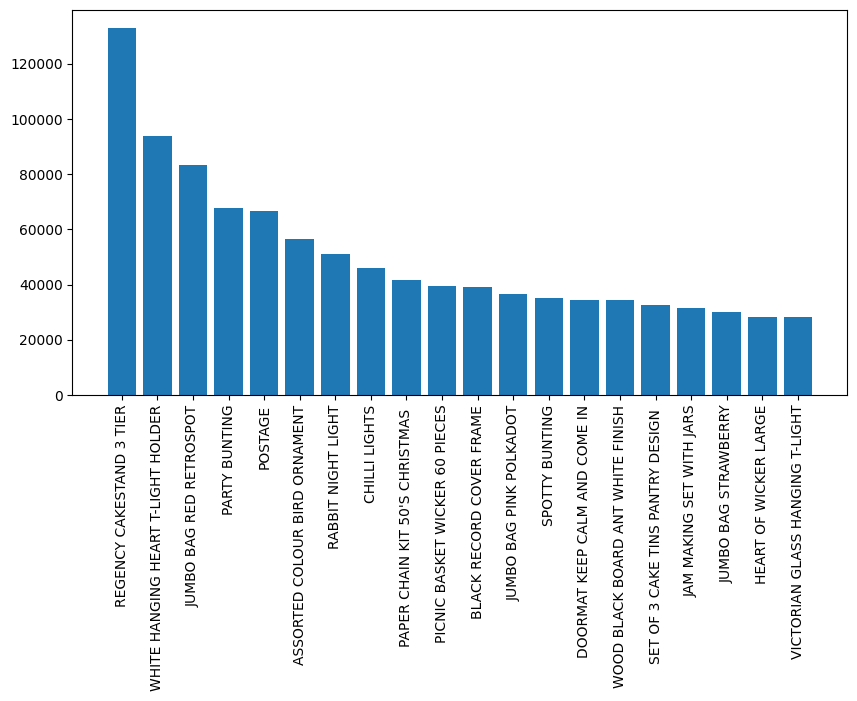

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(top_twenty['Description'], top_twenty['Total'])
plt.xticks(rotation=90)

In [35]:
least_twenty=df.groupby('Description', as_index=False)['Total'].sum()
least_twenty=least_twenty.sort_values('Total')
least_twenty=least_twenty.head(20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Manual'),
  Text(1, 0, 'CRUK Commission'),
  Text(2, 0, 'Discount'),
  Text(3, 0, 'CHALKBOARD KITCHEN ORGANISER'),
  Text(4, 0, 'WHITE CHERRY LIGHTS'),
  Text(5, 0, 'CREAM SWEETHEART MAGAZINE RACK'),
  Text(6, 0, 'WOODEN BOX ADVENT CALENDAR '),
  Text(7, 0, 'ASSORTED TUTTI FRUTTI ROUND BOX'),
  Text(8, 0, 'PINK CHERRY LIGHTS'),
  Text(9, 0, 'BLUE PADDED SOFT MOBILE'),
  Text(10, 0, 'ANTIQUE LILY FAIRY LIGHTS'),
  Text(11, 0, 'CREAM SWEETHEART TRAYS'),
  Text(12, 0, 'TEA TIME CAKE STAND IN GIFT BOX'),
  Text(13, 0, 'CREAM SWEETHEART SHELF + HOOKS'),
  Text(14, 0, '3 WICK CHRISTMAS BRIAR CANDLE '),
  Text(15, 0, 'LARGE ROUND CUTGLASS CANDLESTICK'),
  Text(16, 0, 'PINK SMALL GLASS CAKE STAND'),
  Text(17, 0, 'SWEETHEART KEY CABINET'),
  Text(18, 0, 'FLAMINGO LIGHTS'),
  Text(19, 0, 'PINK POODLE HANGING DECORATION ')])

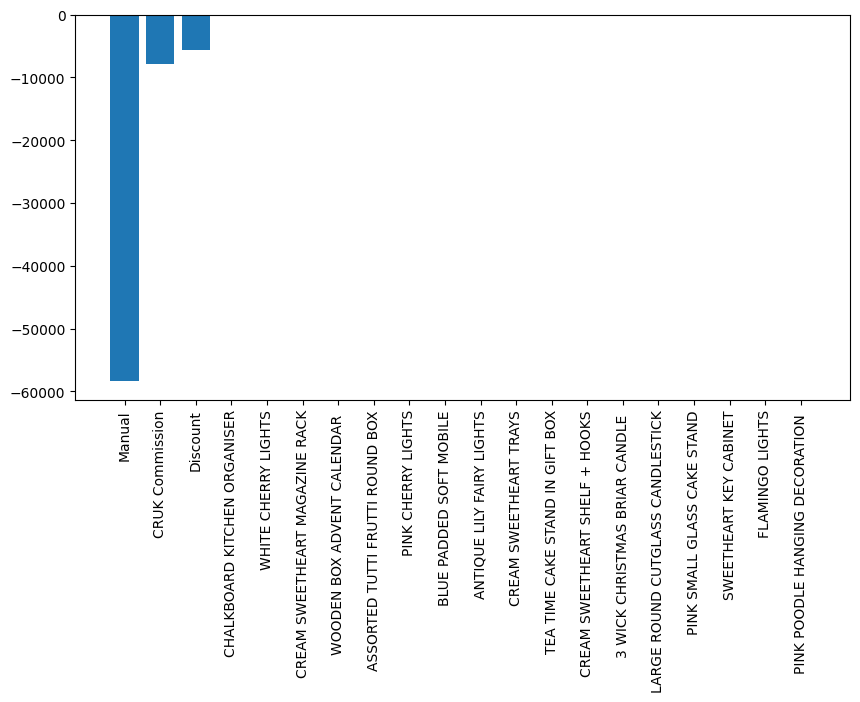

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(least_twenty['Description'], least_twenty['Total'])
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Top 10 Customers')

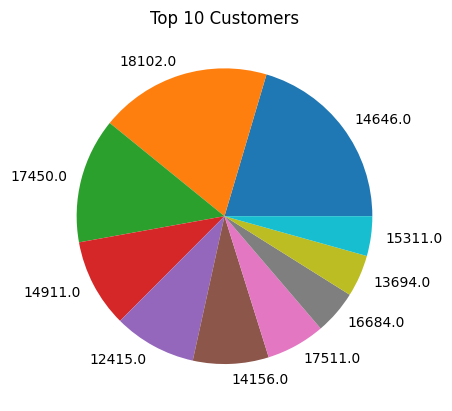

In [37]:
plt.pie(df.groupby('CustomerID', as_index=False)['Total'].sum().sort_values('Total', ascending=False).head(10)['Total'], labels=df.groupby('CustomerID', as_index=False)['Total'].sum().sort_values('Total', ascending=False).head(10)['CustomerID'])
plt.title('Top 10 Customers')

# Data Modelling


## K-Means

In [38]:
final_df

,InvoiceDate,InvoiceNo,Total,Country_Encoded
0,2.317689,-0.391321,-0.230787,0.294937
1,-0.894826,0.383715,0.294119,-2.746157
2,-0.171019,-0.266454,-0.011905,-3.386388
3,-0.726268,-0.085613,-0.016739,-2.426042
4,2.159046,-0.326735,-0.190061,-1.465696
...,...,...,...,...
4375,1.841761,-0.356875,-0.208792,0.294937
4376,0.879989,-0.369793,-0.220945,0.294937
4377,-0.835335,-0.343958,-0.209280,0.294937
4378,-0.874995,2.855218,0.024344,0.294937


In [39]:
wcss=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(final_df)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

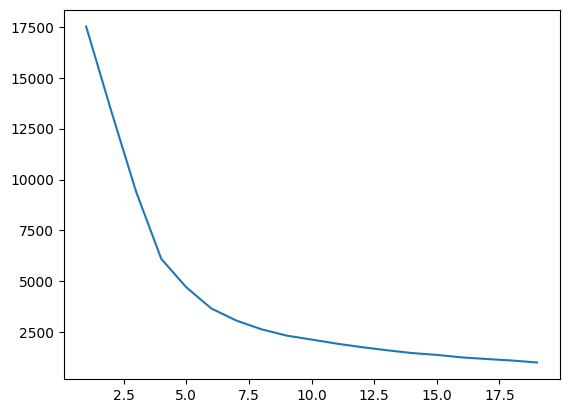

In [40]:
plt.plot(range(1,20), wcss)

In [41]:
kmeans_model=KMeans(n_clusters=5)
kmeans_model.fit(final_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [42]:
final_df

,InvoiceDate,InvoiceNo,Total,Country_Encoded
0,2.317689,-0.391321,-0.230787,0.294937
1,-0.894826,0.383715,0.294119,-2.746157
2,-0.171019,-0.266454,-0.011905,-3.386388
3,-0.726268,-0.085613,-0.016739,-2.426042
4,2.159046,-0.326735,-0.190061,-1.465696
...,...,...,...,...
4375,1.841761,-0.356875,-0.208792,0.294937
4376,0.879989,-0.369793,-0.220945,0.294937
4377,-0.835335,-0.343958,-0.209280,0.294937
4378,-0.874995,2.855218,0.024344,0.294937


In [43]:
kmeans_df=final_df.copy()

In [44]:
kmeans_df["Cluster"] = kmeans_model.labels_


In [45]:
kmeans_df.groupby('Cluster').agg({
    'InvoiceDate':'mean',
    'InvoiceNo':'mean',
    'Total':'mean',
    'Country_Encoded': ['mean', 'count']}).round(2)

InvoiceDate InvoiceNo  Total Country_Encoded      
               mean      mean   mean            mean count
Cluster                                                   
0             -0.52      0.05   0.01            0.27  3026
1              0.04     -0.04   0.02           -3.45   310
2              1.51     -0.28  -0.18            0.26  1033
3             -0.90     20.36   6.47           -0.37     6
4             -0.83      3.96  23.17           -2.01     5

In [46]:
kmeans_df

,InvoiceDate,InvoiceNo,Total,Country_Encoded,Cluster
0,2.317689,-0.391321,-0.230787,0.294937,2
1,-0.894826,0.383715,0.294119,-2.746157,1
2,-0.171019,-0.266454,-0.011905,-3.386388,1
3,-0.726268,-0.085613,-0.016739,-2.426042,1
4,2.159046,-0.326735,-0.190061,-1.465696,2
...,...,...,...,...,...
4375,1.841761,-0.356875,-0.208792,0.294937,2
4376,0.879989,-0.369793,-0.220945,0.294937,2
4377,-0.835335,-0.343958,-0.209280,0.294937,0
4378,-0.874995,2.855218,0.024344,0.294937,0


## SOM


In [47]:
som_process=semi_df.copy()
som_process=som_process.drop('CustomerID', axis=1)

In [48]:
som_df=scaler.fit_transform(som_process)
som_df

array([[ 2.31768856, -0.39132136, -0.23078741,  0.2949372 ],
       [-0.89482578,  0.38371452,  0.2941191 , -2.74615731],
       [-0.17101853, -0.26645447, -0.01190505, -3.38638774],
       ...,
       [-0.83533477, -0.34395805, -0.20927964,  0.2949372 ],
       [-0.87499544,  2.85521783,  0.02434395,  0.2949372 ],
       [-0.4883039 , -0.09853002, -0.00702866,  0.2949372 ]])

In [49]:
# Create and train a Self-Organizing Map
som = MiniSom(x=1, y=5, input_len=som_df.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(som_df, 1000)  # 1000 iterations
som.train_random

# Get the cluster assignments for each data point
cluster_assignments = np.array([som.winner(x) for x in som_df])

# Print or use the cluster assignments as needed
print(cluster_assignments)

[[0 2]
 [0 0]
 [0 0]
 ...
 [0 3]
 [0 4]
 [0 3]]


/usr/local/lib/python3.10/dist-packages/minisom.py:162: UserWarning:




In [50]:
len(cluster_assignments)

4380

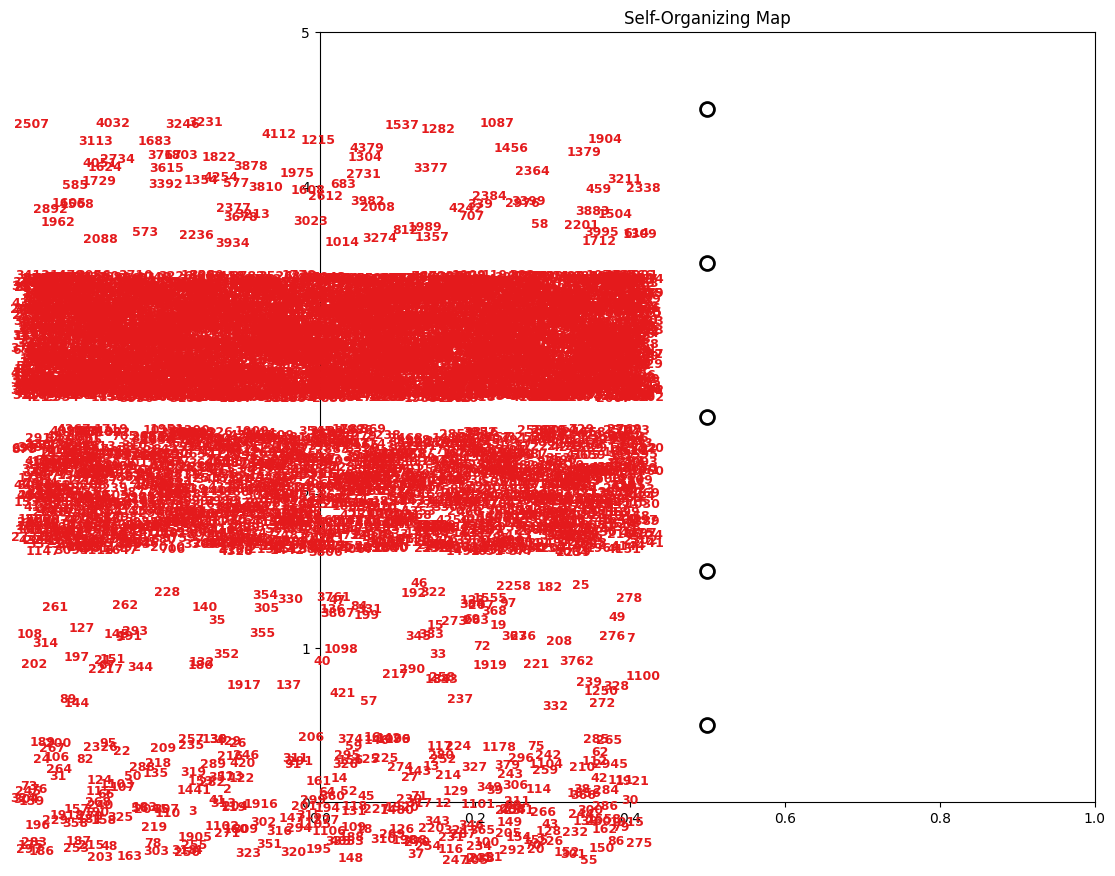

In [51]:
# Visualize the SOM and data points
plt.figure(figsize=(10, 10))

# Plot the SOM grid
for i in range(som.get_weights().shape[0]):
    for j in range(som.get_weights().shape[1]):
        plt.plot(i + 0.5, j + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgecolor='k', markeredgewidth=2)

# Plot data points on the map
for i, (x, y) in enumerate(cluster_assignments):
    plt.text(x + np.random.uniform(-0.4, 0.4), y + np.random.uniform(-0.4, 0.4), str(i + 1), color=plt.cm.Set1(cluster_assignments[i][0] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

plt.xlim(0, som.get_weights().shape[0])
plt.ylim(0, som.get_weights().shape[1])
plt.title('Self-Organizing Map')
plt.show()

## Hierarchial Clustering

In [54]:
df_DBSCAN=final_df.copy()

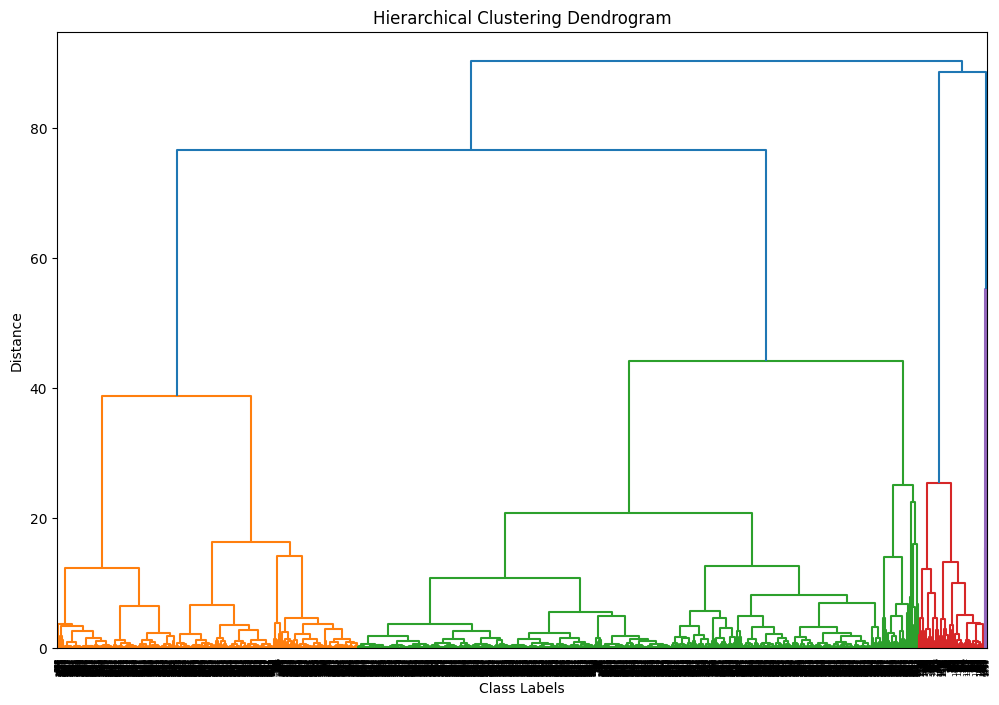

In [67]:
linked = linkage(df_DBSCAN, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=df_DBSCAN.index, distance_sort='ascending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Class Labels')
plt.ylabel('Distance')
plt.show()